In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Open the exact file you uploaded
df = pd.read_csv('GYM.csv')

df.head()

,Gender,Goal,BMI Category,Exercise Schedule,Meal Plan
0,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
1,Male,fat_burn,Underweight,"Light weightlifting, Yoga, and 2000 steps walking","High-calorie, protein-rich diet: Whole milk, p..."
2,Male,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
3,Male,muscle_gain,Overweight,"High-intensity interval training (HIIT), Cardi...","Low-carb, high-fiber diet: Avocado, grilled fi..."
4,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...


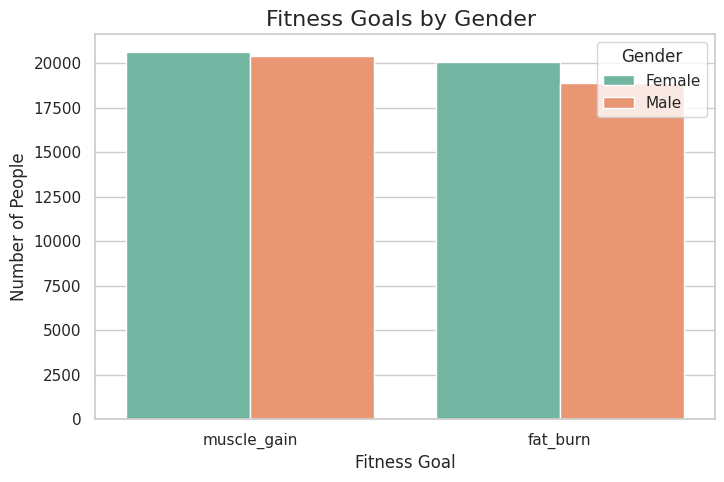

In [3]:
sns.set_theme(style="whitegrid")

# Create the canvas size
plt.figure(figsize=(8, 5))


sns.countplot(data=df, x='Goal', hue='Gender', palette='Set2')

# Add titles and labels so people know what they are looking at
plt.title('Fitness Goals by Gender ', fontsize=16)
plt.xlabel('Fitness Goal', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Show the chart
plt.show()

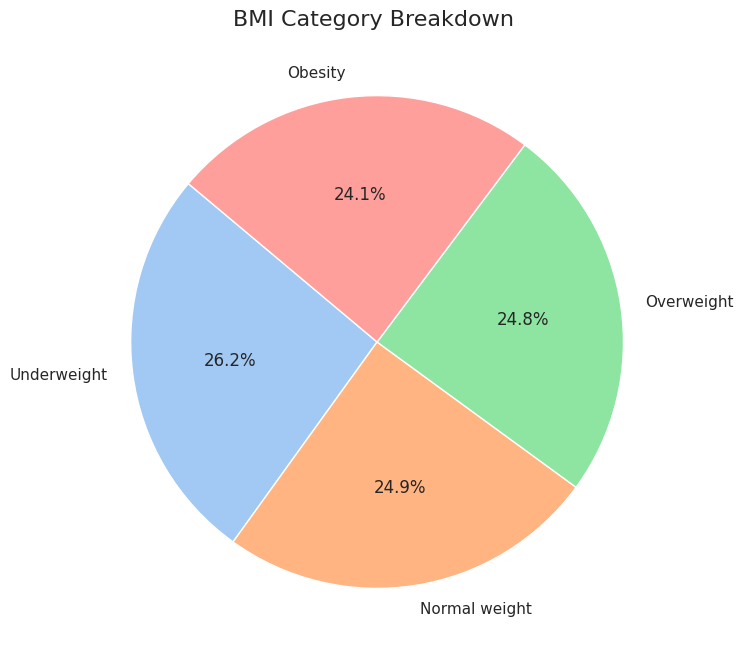

In [4]:
# 1. Count how many people are in each BMI group
bmi_counts = df['BMI Category'].value_counts()

# 2. Set the size of the graph
plt.figure(figsize=(8, 8))

# 3. Draw the pie! 'autopct' tells it to show the exact percentages
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)

# 4. Add a title
plt.title('BMI Category Breakdown ', fontsize=16)

# 5. Show the graph!
plt.show()

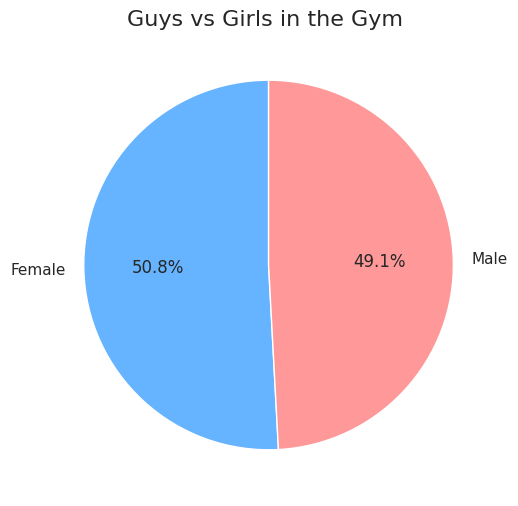

In [5]:
# 1. Count how many Males and Females are in the dataset
gender_counts = df['Gender'].value_counts()

# 2. Make the canvas size
plt.figure(figsize=(6, 6))

# 3. Draw the pie chart!
# We use cool blue and pinkish colors just to tell them apart easily
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)

# 4. Give it a title
plt.title('Guys vs Girls in the Gym ', fontsize=16)

# 5. Show it!
plt.show()

/tmp/ipython-input-542/786128271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Goal', palette='viridis')


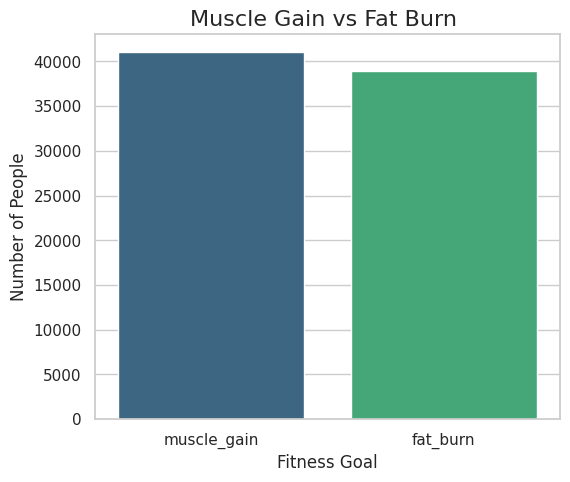

In [6]:
# 1. Set the size of the graph
plt.figure(figsize=(6, 5))

# 2. Draw the bar chart! It counts how many people have each goal
sns.countplot(data=df, x='Goal', palette='viridis')

# 3. Give it a title and labels
plt.title('Muscle Gain vs Fat Burn ', fontsize=16)
plt.xlabel('Fitness Goal', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# 4. Show the chart!
plt.show()

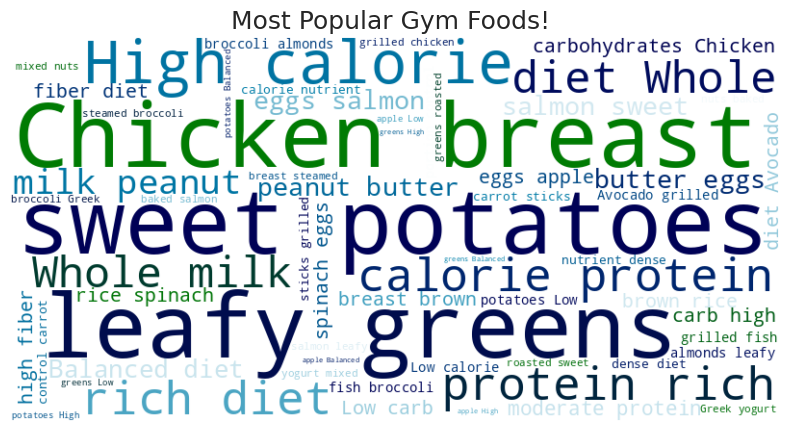

In [10]:
from wordcloud import WordCloud

# 1. We take every single meal plan and smush it into one giant super-sentence!
all_meals = " ".join(df['Meal Plan'].dropna())

# 2. We tell the computer to paint our Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='ocean').generate(all_meals)

# 3. Make the canvas size
plt.figure(figsize=(10, 5))

# 4. Show the magic painting!
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Gym Foods! ', fontsize=18)

plt.show()

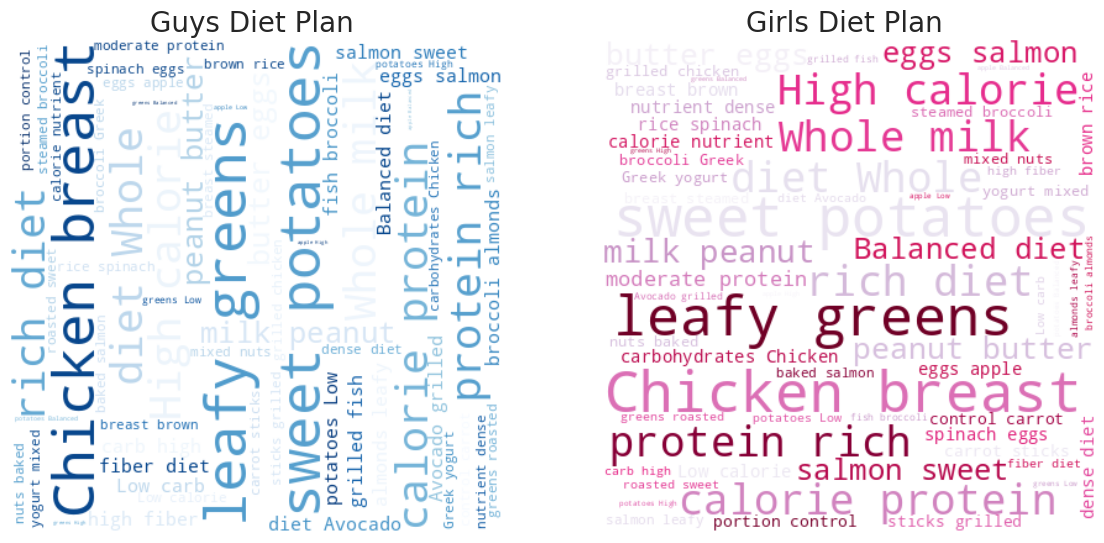

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Grab all the meal plans just for the guys
male_meals = " ".join(df[df['Gender'] == 'Male']['Meal Plan'].dropna())

# 2. Grab all the meal plans just for the girls
female_meals = " ".join(df[df['Gender'] == 'Female']['Meal Plan'].dropna())

# 3. Paint the guys' Word Cloud (using cool blue colors)
wordcloud_male = WordCloud(width=400, height=400, background_color='white', colormap='Blues').generate(male_meals)

# 4. Paint the girls' Word Cloud (using pink/purple colors)
wordcloud_female = WordCloud(width=400, height=400, background_color='white', colormap='PuRd').generate(female_meals)

# 5. Make a giant canvas to hold BOTH pictures side-by-side
plt.figure(figsize=(14, 7))

# Put the guys' picture on the left
plt.subplot(1, 2, 1) # This means: 1 row, 2 columns, 1st spot
plt.imshow(wordcloud_male, interpolation='bilinear')
plt.axis('off') # Hide the ugly graph lines
plt.title('Guys Diet Plan ', fontsize=20)

# Put the girls' picture on the right
plt.subplot(1, 2, 2) # This means: 1 row, 2 columns, 2nd spot
plt.imshow(wordcloud_female, interpolation='bilinear')
plt.axis('off') # Hide the ugly graph lines
plt.title('Girls Diet Plan ', fontsize=20)

# Show the paintings!
plt.show()

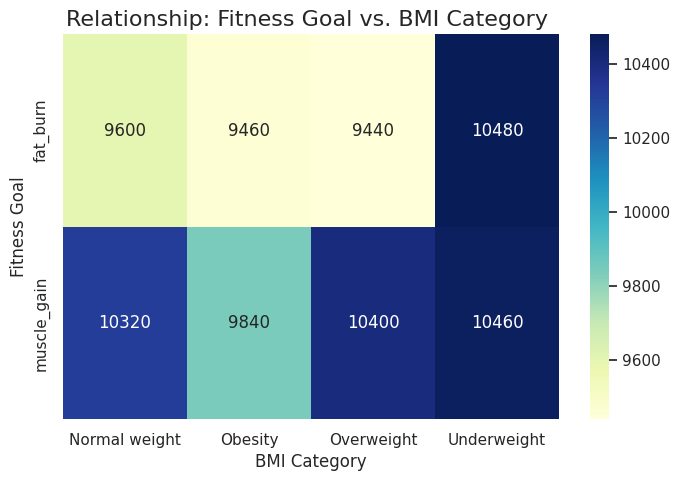

In [8]:
# 1. First, we make a 2D table that groups up Goal and BMI Category
relation_table = pd.crosstab(df['Goal'], df['BMI Category'])

# 2. Make the canvas size
plt.figure(figsize=(8, 5))

# 3. Paint the Heatmap!
# 'annot=True' writes the exact numbers inside the boxes for us.
# 'cmap' sets the color scheme (YlGnBu means Yellow to Green to Blue).
sns.heatmap(relation_table, annot=True, cmap='YlGnBu', fmt='g')

# 4. Add our titles
plt.title('Relationship: Fitness Goal vs. BMI Category ', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Fitness Goal', fontsize=12)

# 5. Show the glowing checkerboard!
plt.show()

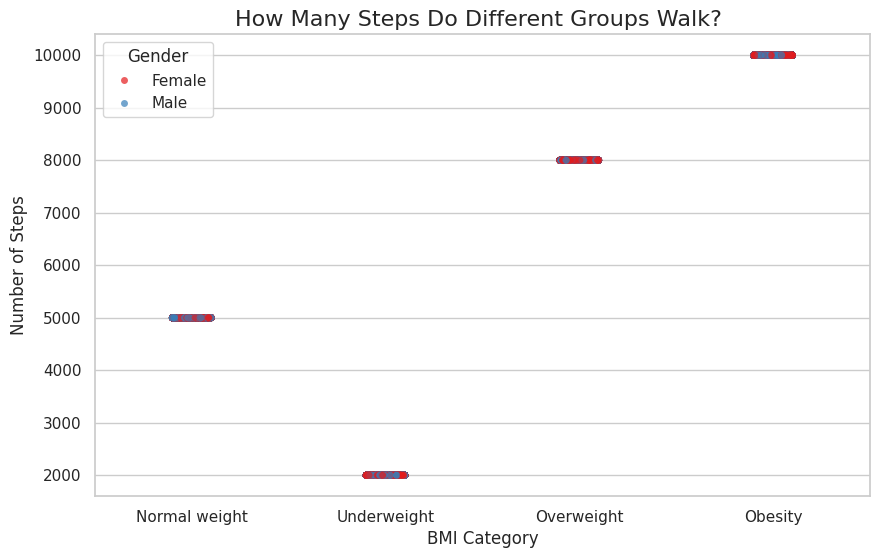

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. MAGIC TRICK: Pull out the number of "steps" from the text and turn it into a real number!
df['Steps'] = df['Exercise Schedule'].str.extract(r'(\d+)').astype(float)

# 2. Set the canvas size
plt.figure(figsize=(10, 6))

# 3. Draw the 2D proper graph! (A stripplot is basically a scatter plot for categories)
sns.stripplot(data=df, x='BMI Category', y='Steps', hue='Gender', palette='Set1', jitter=True, alpha=0.7)

# 4. Add our titles
plt.title('How Many Steps Do Different Groups Walk? ', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Number of Steps', fontsize=12)

# 5. Show the awesome 2D graph!
plt.show()